# Problem Statement
https://www.kaggle.com/c/dogs-vs-cats/data

There are two zipped files - one for training and one for testing. The training contains images of cat or dog - the files are named accordingly. With the purpose of model building the files in the training have been distributed into directories - training and validation with 70/30 splits by count.   

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

import skimage as ski
import skimage.io


from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, InputLayer
from tensorflow.keras.models import Sequential

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/Users/abasar/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
data_home = "/Users/abasar/data/dogs-vs-cats"

In [17]:
# organize dataset into a useful structure
from os import makedirs
from os import listdir
from shutil import copyfile
from random import seed
from random import random
# create directories
dataset_home = data_home + "/prep/"
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['dogs/', 'cats/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.30
# copy training dataset images into subdirectories
src_directory = data_home + '/train'
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('cat'):
        dst = dataset_home + dst_dir + 'cats/'  + file
        copyfile(src, dst)
    elif file.startswith('dog'):
        dst = dataset_home + dst_dir + 'dogs/'  + file
        copyfile(src, dst)
        

In [19]:
# load dogs vs cats dataset, reshape and save to a new file
from os import listdir
from numpy import asarray
from numpy import save
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
# define location of dataset
folder = data_home + '/train/'
photos, labels = list(), list()
# enumerate files in the directory
for file in listdir(folder):
    # determine class
    output = 0.0
    if file.startswith('cat'):
        output = 1.0
    # load image
    photo = load_img(folder + file, target_size=(200, 200))
    # convert to numpy array
    photo = img_to_array(photo)
    # store
    photos.append(photo)
    labels.append(output)
# convert to a numpy arrays
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# save the reshaped photos
save(data_home + '/dogs_vs_cats_photos.npy', photos)
save(data_home + '/dogs_vs_cats_labels.npy', labels)

(25000, 200, 200, 3) (25000,)


In [5]:
y = np.array([1 if "/cat/" in path else 0 for path in files])

In [6]:
pd.Series(y).value_counts()

1    8788
0    8712
dtype: int64

In [3]:
files = os.listdir(data_home + "/train")
files[:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [4]:
len(files)

25000

In [5]:
len([f for f in files if "cat" in f])

12500

In [6]:
len([f for f in files if "dog" in f])

12500

cat.8209.jpg


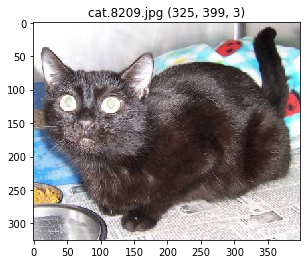

In [16]:
path = files[100]
print(path)
img = ski.io.imread(data_home + "/train/" + path)
plt.imshow(img)
plt.title(path +" " + str(img.shape));

In [29]:
paths = np.array([data_home + "/train/" + f for f in files])
paths[:5]

array(['/Users/abasar/data/dogs-vs-cats/train/dog.8011.jpg',
       '/Users/abasar/data/dogs-vs-cats/train/cat.5077.jpg',
       '/Users/abasar/data/dogs-vs-cats/train/dog.7322.jpg',
       '/Users/abasar/data/dogs-vs-cats/train/cat.2718.jpg',
       '/Users/abasar/data/dogs-vs-cats/train/cat.10151.jpg'],
      dtype='<U51')

In [19]:
sizes = set()
for i, fname in enumerate(paths):
    img = ski.io.imread(fname)
    sizes.add(img.shape)
sizes

KeyboardInterrupt: 

In [28]:
import numpy as np
y = np.array([1 if "cat" in f else 0 for f in files])
y

array([0, 1, 0, ..., 0, 1, 1])

# Show cat pictures

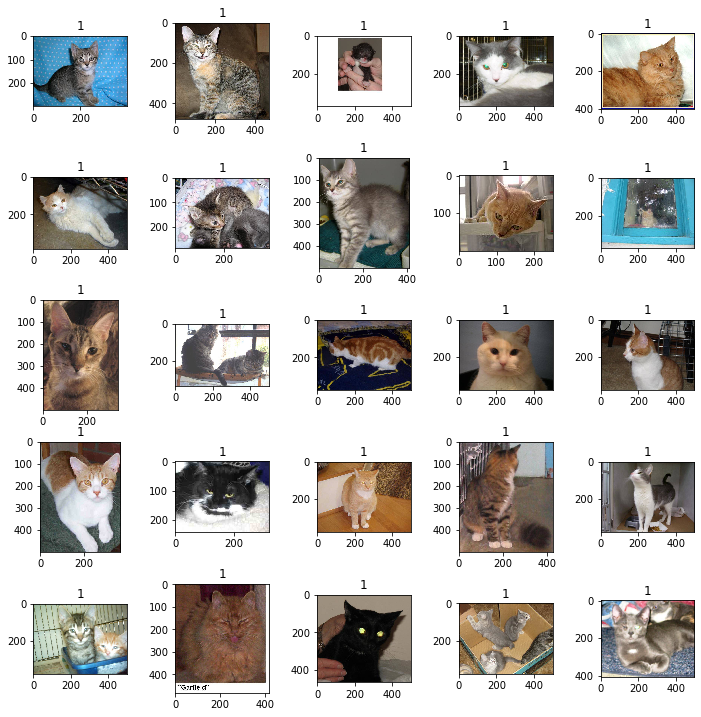

In [32]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
plt.tight_layout()

for i, ax in enumerate(fig.axes):
    file = paths[y==1][i]
    ax.imshow(ski.io.imread(file))
    ax.set_title(y[y==1][i])

# Show dog pictures

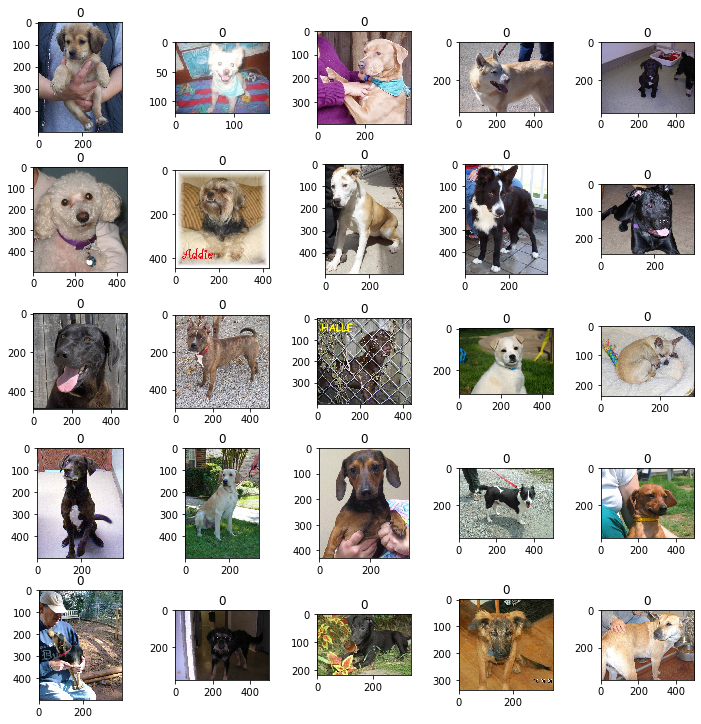

In [33]:
fig, _ = plt.subplots(5, 5, figsize = (10, 10))
plt.tight_layout()

for i, ax in enumerate(fig.axes):
    file = paths[y==0][i]
    ax.imshow(ski.io.imread(file))
    ax.set_title(y[y==0][i])

In [34]:
# define cnn model
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), 
                     activation='relu', 
                     kernel_initializer='he_uniform', 
                     padding='same', 
                     input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


# define model
model = define_model()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               40960128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 40,961,153
Trainable params: 40,961,153
Non-trainable params: 0
_________________________________________________________________


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1.0/255.0)

train_it = datagen.flow_from_directory(data_home + '/prep/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(data_home + '/prep/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))

Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


In [36]:
history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

293/293 [==============================] - 251s 857ms/step - loss: 0.6961 - accuracy: 0.5499 - val_loss: 0.6678 - val_accuracy: 0.5794


In [38]:
_, acc = model.evaluate(test_it, steps=len(test_it), verbose=0)
print('Validation accuracy: %.3f' % (acc * 100.0))

> 57.941


In [35]:
history.history

{'loss': [0.7017508149147034],
 'accuracy': [0.5381612181663513],
 'val_loss': [0.672216534614563],
 'val_accuracy': [0.576709508895874]}

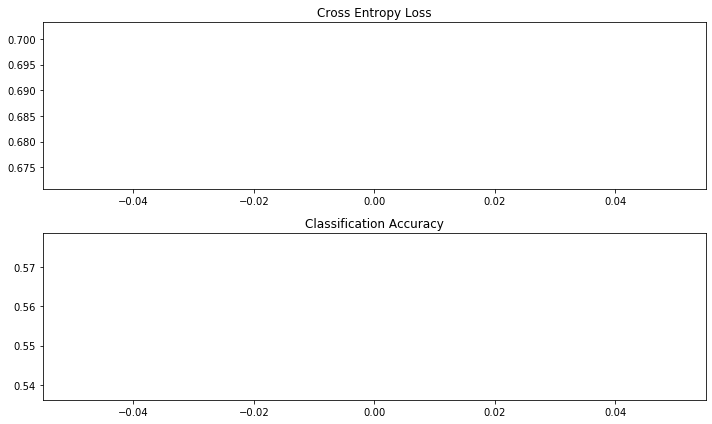

In [36]:
# plot diagnostic learning curves
import matplotlib.pyplot as plt
def summarize_diagnostics(history):
    plt.figure(figsize=(10, 6))
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    plt.tight_layout()
    
summarize_diagnostics(history)

In [41]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image augmnentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1/255.0,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


train_it = datagen.flow_from_directory(data_home + '/prep/train/',
    class_mode='binary', batch_size=64, target_size=(200, 200))
test_it = datagen.flow_from_directory(data_home + '/prep/test/',
    class_mode='binary', batch_size=64, target_size=(200, 200))


Found 18697 images belonging to 2 classes.
Found 6303 images belonging to 2 classes.


- rotation_range is a value in degrees (0-180), a range within which to randomly rotate pictures
- width_shift and height_shift are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally
- rescale is a value by which we will multiply the data before any other processing. Our original images consist in RGB coefficients in the 0-255, but such values would be too high for our models to process (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255. factor.
- shear_range is for randomly applying shearing transformations
- zoom_range is for randomly zooming inside pictures
- horizontal_flip is for randomly flipping half of the images horizontally --relevant when there are no assumptions of horizontal assymetry (e.g. real-world pictures).
- fill_mode is the strategy used for filling in newly created pixels, which can appear after a - rotation or a width/height shift.

In [42]:
# One block VGG

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu'
                     , kernel_initializer='he_uniform'
                     , padding='same'
                     , input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)

207/293 [====================>.........] - ETA: 1:26 - loss: 0.6899 - accuracy: 0.5321

KeyboardInterrupt: 

In [ ]:
# Two block VGG

def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model

history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)


In [60]:
# Three Block VGG model


def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model

model = define_model()

history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 25, 25, 128)       0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 80000)            

KeyboardInterrupt: 

In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    return model


model = define_model()

history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)

In [ ]:
# Define a model using pretrained VGG16 model

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model

# define cnn model
def define_model():
    # load model
    model = VGG16(include_top=False, input_shape=(224, 224, 3))
    # mark loaded layers as not trainable
    for layer in model.layers:
        layer.trainable = False
    # add new classifier layers
    flat1 = Flatten()(model.layers[-1].output)
    class1 = Dense(128, activation='relu', kernel_initializer='he_uniform')(flat1)
    output = Dense(1, activation='sigmoid')(class1)
    # define new model
    model = Model(inputs=model.inputs, outputs=output)
    # compile model
    opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()
    return model


model = define_model()


# Image augmnentation
datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1/255.0,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')


train_it = datagen.flow_from_directory(data_home + '/prep/train/',
    class_mode='binary', batch_size=64, target_size=(224, 224))
test_it = datagen.flow_from_directory(data_home + '/prep/test/',
    class_mode='binary', batch_size=64, target_size=(224, 224))



history = model.fit(train_it, 
                    steps_per_epoch=len(train_it),
                    validation_data=test_it, 
                    validation_steps=len(test_it), 
                    epochs=1, 
                    verbose=1)

_, acc = model.evaluate_generator(test_it, steps=len(test_it), verbose=0)
print('> %.3f' % (acc * 100.0))

summarize_diagnostics(history)

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)     

In [ ]:
model.save('/tmp/final_model.h5')

In [ ]:
# make a prediction for a new image.
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model

# load and prepare the image
def load_image(filename):
    # load the image
    img = load_img(filename, target_size=(224, 224))
    # convert to array
    img = img_to_array(img)
    # reshape into a single sample with 3 channels
    img = img.reshape(1, 224, 224, 3)
    # center pixel data
    img = img.astype('float32')
    #img = img - [123.68, 116.779, 103.939]
    return img

# load an image and predict the class
def run_example():
    # load the image
    img = load_image('sample_image.jpg')
    # load model
    model = load_model('/tmp/final_model.h5')
    # predict the class
    result = model.predict(img)
    print(result[0])

# entry point, run the example
run_example()
